<a href="https://colab.research.google.com/github/SuganyaDharmalingam/Machine-Learning/blob/main/Weather_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
from google.colab import files
upload = files.upload()

Saving sample.csv to sample.csv


In [ ]:
df = pd.read_csv('sample.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y %H:%M:%S')
print(df.shape)
df.head()

(52560, 21)


,DateTime,p (mbar),T_degC,Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,2020-06-01 00:00:00,996.11,12.25,6.06,65.84,14.28,9.40,4.88,5.89,9.44,1211.52,1.42,2.25,359.6,0.0,0,0.0,0.0,0.0,22.07,429.8
1,2020-06-01 00:10:00,996.16,12.39,6.77,68.48,14.41,9.87,4.54,6.18,9.91,1210.77,0.77,1.69,125.9,0.0,0,0.0,0.0,0.0,21.86,445.6
2,2020-06-01 00:20:00,996.21,11.95,6.21,67.85,14.00,9.50,4.50,5.95,9.53,1212.87,0.51,1.10,223.8,0.0,0,0.0,0.0,0.0,21.66,434.6
3,2020-06-01 00:30:00,996.26,12.26,5.53,63.42,14.29,9.06,5.23,5.68,9.09,1211.82,0.52,1.14,325.0,0.0,0,0.0,0.0,0.0,21.47,426.6
4,2020-06-01 00:40:00,996.31,12.95,5.35,59.83,14.95,8.94,6.01,5.60,8.98,1209.01,0.82,1.27,350.5,0.0,0,0.0,0.0,0.0,21.29,424.3


# Raw Data Visualization

IndexError: ignored

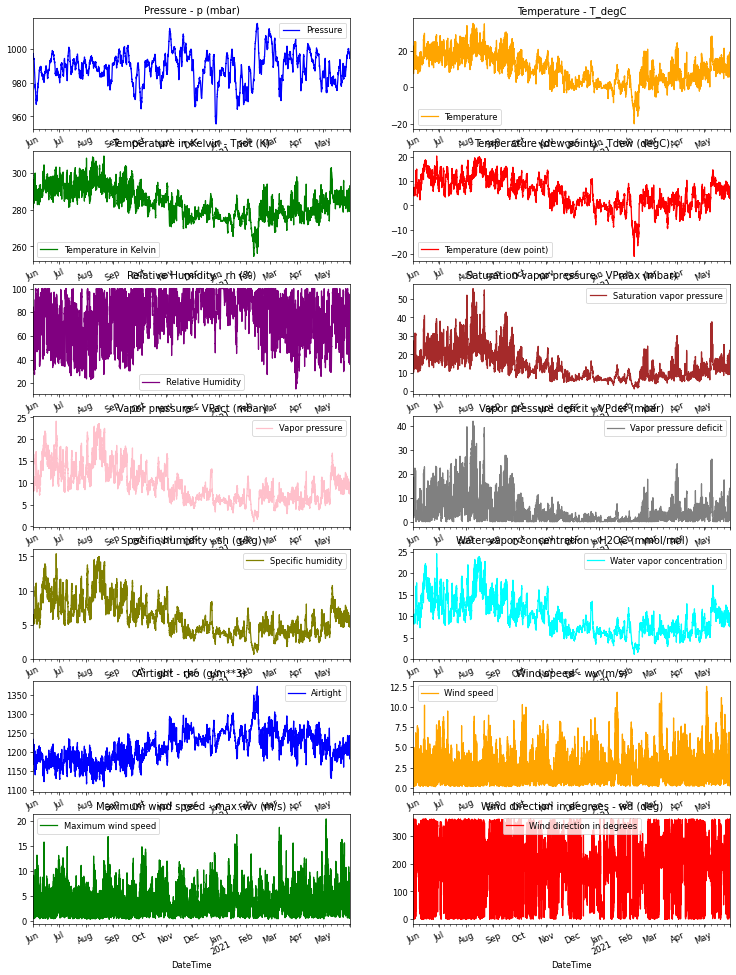

In [ ]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
    "Rain in millimeter",
    "Raining in seconds",
    "Saturated wind driven rain",
    "Photosythetically ctive radiation",
    "maximum PAR",
    "Temparature(log)",
    "Carbondioxide",
]

feature_keys = [
    "p (mbar)",
    "T_degC",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
    "rain (mm)",
    "raining (s)",
    "SWDR (W/m²)",
    "PAR (μmol/m²/s)",
    "max.PAR (μmol/m²/s)",
    "Tlog (degC)",
    "CO2 (ppm)",

    ]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "DateTime"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=60, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

# Feature Correlation Heatmap - Raw Data

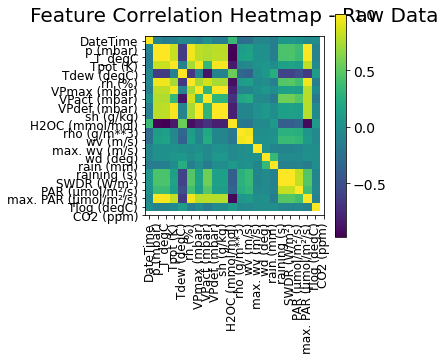

In [ ]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=12, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=12)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap - Raw Data", fontsize=20)
    plt.show()


show_heatmap(df)

## Feature Matrix

In [ ]:
X = df.drop(['T_degC', 'DateTime'],axis=1)   #Feature Matrix
y = df["T_degC"]

In [ ]:
df.head()

,DateTime,p (mbar),T_degC,Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,2020-06-01 00:00:00,996.11,12.25,6.06,65.84,14.28,9.40,4.88,5.89,9.44,1211.52,1.42,2.25,359.6,0.0,0,0.0,0.0,0.0,22.07,429.8
1,2020-06-01 00:10:00,996.16,12.39,6.77,68.48,14.41,9.87,4.54,6.18,9.91,1210.77,0.77,1.69,125.9,0.0,0,0.0,0.0,0.0,21.86,445.6
2,2020-06-01 00:20:00,996.21,11.95,6.21,67.85,14.00,9.50,4.50,5.95,9.53,1212.87,0.51,1.10,223.8,0.0,0,0.0,0.0,0.0,21.66,434.6
3,2020-06-01 00:30:00,996.26,12.26,5.53,63.42,14.29,9.06,5.23,5.68,9.09,1211.82,0.52,1.14,325.0,0.0,0,0.0,0.0,0.0,21.47,426.6
4,2020-06-01 00:40:00,996.31,12.95,5.35,59.83,14.95,8.94,6.01,5.60,8.98,1209.01,0.82,1.27,350.5,0.0,0,0.0,0.0,0.0,21.29,424.3


In [ ]:
X.head()

,p (mbar),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,996.11,6.06,65.84,14.28,9.40,4.88,5.89,9.44,1211.52,1.42,2.25,359.6,0.0,0,0.0,0.0,0.0,22.07,429.8
1,996.16,6.77,68.48,14.41,9.87,4.54,6.18,9.91,1210.77,0.77,1.69,125.9,0.0,0,0.0,0.0,0.0,21.86,445.6
2,996.21,6.21,67.85,14.00,9.50,4.50,5.95,9.53,1212.87,0.51,1.10,223.8,0.0,0,0.0,0.0,0.0,21.66,434.6
3,996.26,5.53,63.42,14.29,9.06,5.23,5.68,9.09,1211.82,0.52,1.14,325.0,0.0,0,0.0,0.0,0.0,21.47,426.6
4,996.31,5.35,59.83,14.95,8.94,6.01,5.60,8.98,1209.01,0.82,1.27,350.5,0.0,0,0.0,0.0,0.0,21.29,424.3


Train and Test

In [ ]:
# separate dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((36792, 19), (15768, 19))

In [ ]:
X_train.corr()

,p (mbar),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
p (mbar),1.000000,-0.120567,-0.037134,-0.050591,-0.114638,0.011818,-0.131500,-0.131603,0.353446,-0.258349,-0.246431,-0.075560,-0.064105,-0.139548,0.064820,0.058817,0.039013,-0.035684,0.006135
Tdew (degC),-0.120567,1.000000,-0.118515,0.738122,0.971711,0.335851,0.971033,0.971459,-0.837271,-0.050182,-0.044099,0.034150,0.063424,-0.020663,0.147990,0.161678,0.133430,0.806759,-0.034381
rh (%),-0.037134,-0.118515,1.000000,-0.665860,-0.095434,-0.869452,-0.093847,-0.094140,0.558475,-0.305190,-0.357561,0.007818,0.077539,0.252366,-0.574612,-0.576551,-0.491345,-0.642695,0.107159
VPmax (mbar),-0.050591,0.738122,-0.665860,1.000000,0.740077,0.873004,0.738820,0.739055,-0.900622,0.106947,0.143365,-0.026039,0.002605,-0.127024,0.468487,0.481825,0.398920,0.958161,-0.130363
VPact (mbar),-0.114638,0.971711,-0.095434,0.740077,1.000000,0.318093,0.999825,0.999827,-0.799497,-0.071328,-0.066899,0.014242,0.071991,-0.009431,0.138802,0.152481,0.123323,0.778151,-0.030661
VPdef (mbar),0.011818,0.335851,-0.869452,0.873004,0.318093,1.000000,0.316449,0.316778,-0.689815,0.202478,0.250604,-0.047042,-0.048538,-0.172227,0.559764,0.568648,0.472925,0.786410,-0.161536
sh (g/kg),-0.131500,0.971033,-0.093847,0.738820,0.999825,0.316449,1.000000,0.999997,-0.802912,-0.066871,-0.062683,0.015820,0.073355,-0.006773,0.137114,0.150850,0.122217,0.776312,-0.030561
H2OC (mmol/mol),-0.131603,0.971459,-0.094140,0.739055,0.999827,0.316778,0.999997,1.000000,-0.803424,-0.066727,-0.062527,0.015943,0.073289,-0.006868,0.137280,0.151020,0.122377,0.776763,-0.030616
rho (g/m**3),0.353446,-0.837271,0.558475,-0.900622,-0.799497,-0.689815,-0.802912,-0.803424,1.000000,-0.173957,-0.201450,-0.035909,-0.031706,0.084609,-0.375323,-0.388432,-0.328723,-0.931522,0.086387
wv (m/s),-0.258349,-0.050182,-0.305190,0.106947,-0.071328,0.202478,-0.066871,-0.066727,-0.173957,1.000000,0.960166,-0.000962,0.006792,0.016847,0.282059,0.283233,0.255664,0.054317,-0.042075


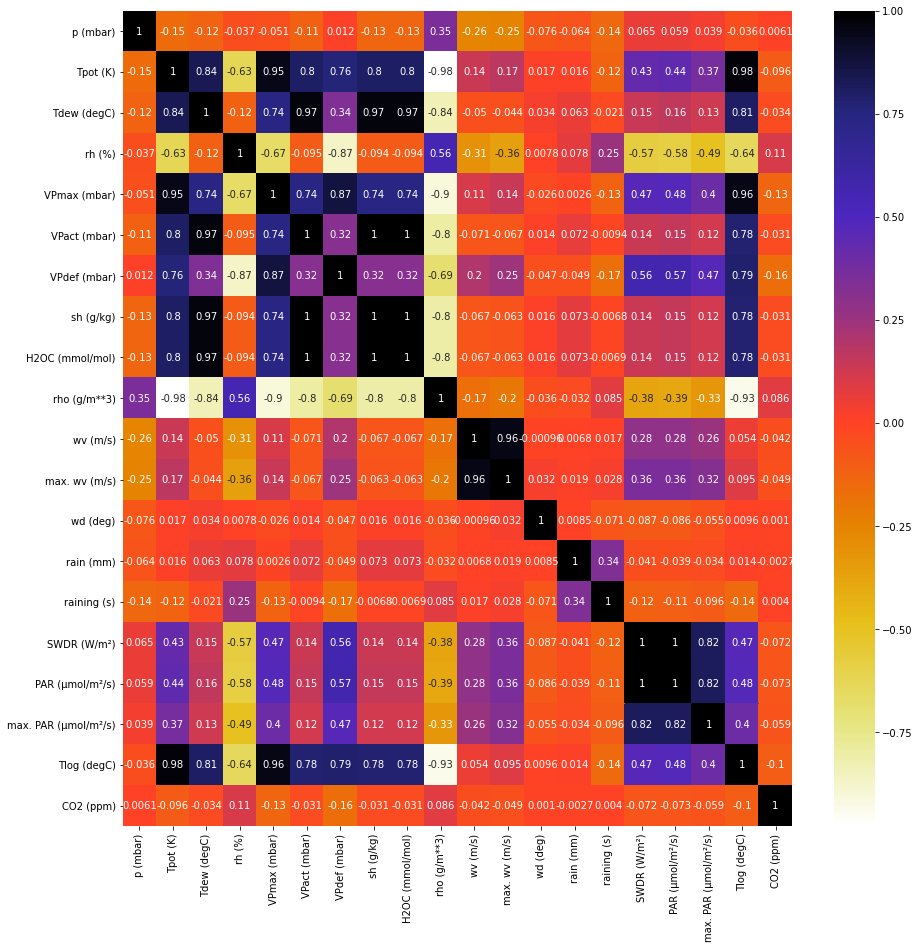

In [ ]:
import seaborn as sns
#Using Pearson Correlation

plt.figure(figsize=(15,15))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Highly correlated features

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

8

In [ ]:
corr_features

{'H2OC (mmol/mol)',
 'PAR (µmol/m²/s)',
 'Tdew (degC)',
 'Tlog (degC)',
 'VPact (mbar)',
 'VPdef (mbar)',
 'VPmax (mbar)',
 'max. PAR (µmol/m²/s)',
 'max. wv (m/s)',
 'sh (g/kg)'}

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,p (mbar),Tdew (degC),rh (%),VPmax (mbar),rho (g/m**3),wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),CO2 (ppm)
50042,980.67,9.11,68.73,16.85,1181.15,1.72,283.70,0.0,0,335.96,414.6
35069,976.69,-2.32,92.50,5.57,1248.91,2.43,51.35,0.0,0,41.82,429.0
30774,977.73,-0.89,74.62,7.67,1229.93,2.53,195.70,0.0,0,0.00,427.2
918,981.15,10.33,89.30,14.07,1192.72,2.34,166.00,0.0,0,201.11,426.2
14516,992.17,14.21,62.01,26.18,1164.54,2.04,262.90,0.0,0,0.00,410.0
...,...,...,...,...,...,...,...,...,...,...,...
12447,980.49,7.81,40.72,26.03,1153.62,6.05,252.80,0.0,0,514.36,401.1
25252,1000.00,4.68,90.30,9.45,1243.24,1.52,259.00,0.0,0,22.88,425.7
42300,989.35,0.63,70.62,9.06,1233.72,3.20,276.20,0.0,0,19.68,417.9
22890,1004.88,0.78,100.00,6.47,1274.79,0.98,153.40,0.0,0,0.00,458.3


In [ ]:
df.describe()

,p (mbar),T_degC,Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,989.012843,9.846668,5.323914,76.926424,13.901935,9.665383,4.236467,6.108394,9.777772,1214.052746,2.113126,3.487508,179.784727,0.011022,37.021880,125.001283,246.632160,298.632606,20.330781,425.650032
std,8.975463,8.279224,6.205687,19.428277,7.951035,4.073634,5.644621,2.591740,4.131223,39.475156,1.523937,2.331430,80.822297,0.119188,132.687745,207.374753,405.861467,568.943574,8.613776,182.847840
min,955.580000,-19.960000,-21.170000,15.210000,1.240000,1.120000,0.000000,0.710000,1.140000,1107.380000,0.130000,0.260000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,-6.140000,-9999.000000
25%,983.960000,3.100000,0.730000,63.540000,7.640000,6.440000,0.540000,4.060000,6.520000,1184.450000,1.000000,1.770000,147.400000,0.000000,0.000000,0.000000,0.000000,0.000000,13.500000,416.400000
50%,989.620000,9.380000,5.430000,81.100000,11.790000,8.990000,2.020000,5.670000,9.090000,1213.910000,1.720000,2.870000,198.400000,0.000000,0.000000,2.945000,9.170000,12.105000,19.470000,425.300000
75%,994.510000,15.770000,9.770000,93.600000,17.940000,12.100000,5.520000,7.660000,12.260000,1243.260000,2.780000,4.580000,230.200000,0.000000,0.000000,174.262500,348.245000,409.450000,26.170000,438.800000
max,1015.400000,34.800000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,24.530000,1372.810000,12.510000,20.390000,360.000000,11.200000,600.000000,1126.590000,2185.170000,2498.940000,49.090000,524.200000


In [ ]:
df.isnull().any()

DateTime                False
p (mbar)                False
T_degC                  False
Tdew (degC)             False
rh (%)                  False
VPmax (mbar)            False
VPact (mbar)            False
VPdef (mbar)            False
sh (g/kg)               False
H2OC (mmol/mol)         False
rho (g/m**3)            False
wv (m/s)                False
max. wv (m/s)           False
wd (deg)                False
rain (mm)               False
raining (s)             False
SWDR (W/m²)             False
PAR (µmol/m²/s)         False
max. PAR (µmol/m²/s)    False
Tlog (degC)             False
CO2 (ppm)               False
dtype: bool

In [ ]:
df = df.fillna(method='ffill')

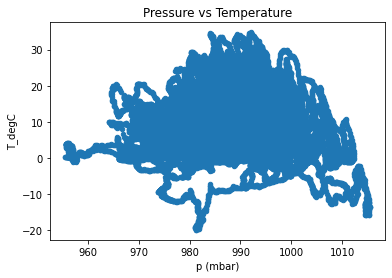

In [ ]:
df.plot.scatter(x='p (mbar)', y='T_degC', style='o')
plt.title('Pressure vs Temperature')
plt.xlabel('p (mbar)')
plt.ylabel('T_degC')
plt.show()


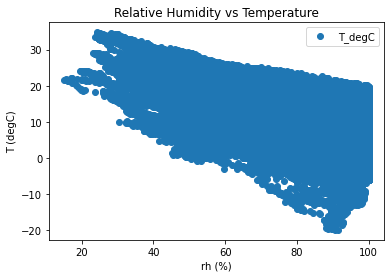

In [ ]:
df.plot(x='rh (%)', y='T_degC', style='o')
plt.title('Relative Humidity vs Temperature')
plt.xlabel('rh (%)')
plt.ylabel('T (degC)')
plt.show()


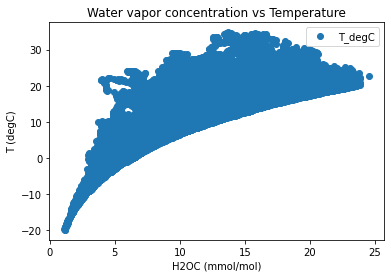

In [ ]:
df.plot(x='H2OC (mmol/mol)', y='T_degC', style='o')
plt.title('Water vapor concentration vs Temperature')
plt.xlabel('H2OC (mmol/mol)')
plt.ylabel('T (degC)')
plt.show()

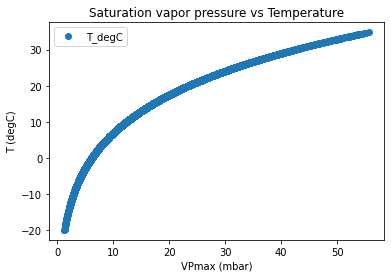

In [ ]:
df.plot(x='VPmax (mbar)', y='T_degC', style='o')
plt.title('Saturation vapor pressure vs Temperature')
plt.xlabel('VPmax (mbar)')
plt.ylabel('T (degC)')
plt.show()


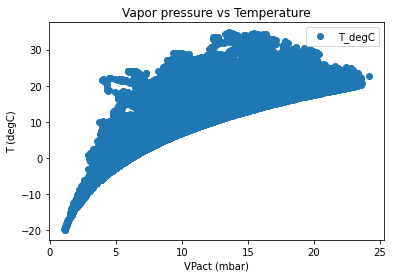

In [ ]:
df.plot(x='VPact (mbar)', y='T_degC', style='o')
plt.title('Vapor pressure vs Temperature')
plt.xlabel('VPact (mbar)')
plt.ylabel('T (degC)')
plt.show()

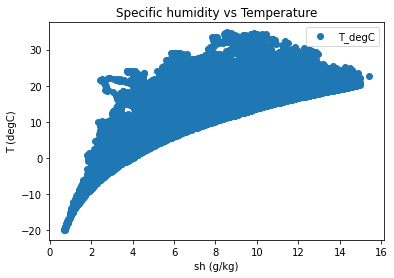

In [ ]:
df.plot(x='sh (g/kg)', y='T_degC', style='o')
plt.title('Specific humidity vs Temperature')
plt.xlabel('sh (g/kg)')
plt.ylabel('T (degC)')
plt.show()

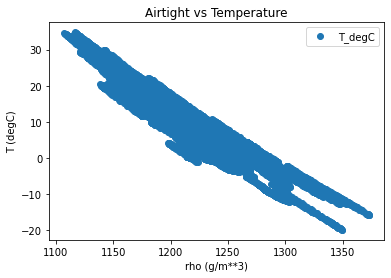

In [ ]:
df.plot(x='rho (g/m**3)', y='T_degC', style='o')
plt.title('Airtight vs Temperature')
plt.xlabel('rho (g/m**3)')
plt.ylabel('T (degC)')
plt.show()

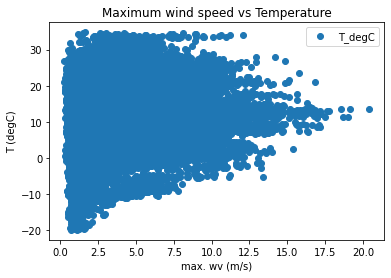

In [ ]:
df.plot(x='max. wv (m/s)', y='T_degC', style='o')
plt.title('Maximum wind speed vs Temperature')
plt.xlabel('max. wv (m/s)')
plt.ylabel('T (degC)')
plt.show()

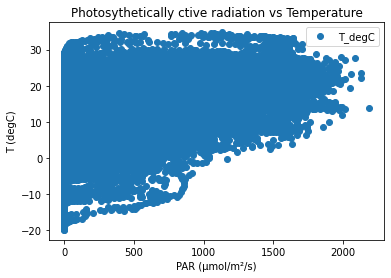

In [ ]:
df.plot(x='PAR (µmol/m²/s)', y='T_degC', style='o')
plt.title('Photosythetically ctive radiation vs Temperature')
plt.xlabel('PAR (µmol/m²/s)')
plt.ylabel('T (degC)')
plt.show()

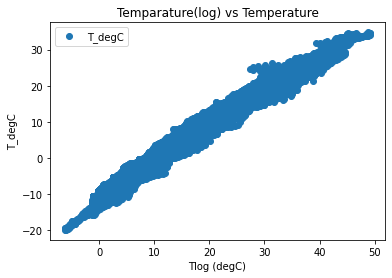

In [ ]:
df.plot(x='Tlog (degC)', y='T_degC', style='o')
plt.title('Temparature(log) vs Temperature')
plt.xlabel('Tlog (degC)')
plt.ylabel('T_degC')
plt.show()

Scatter and density plots

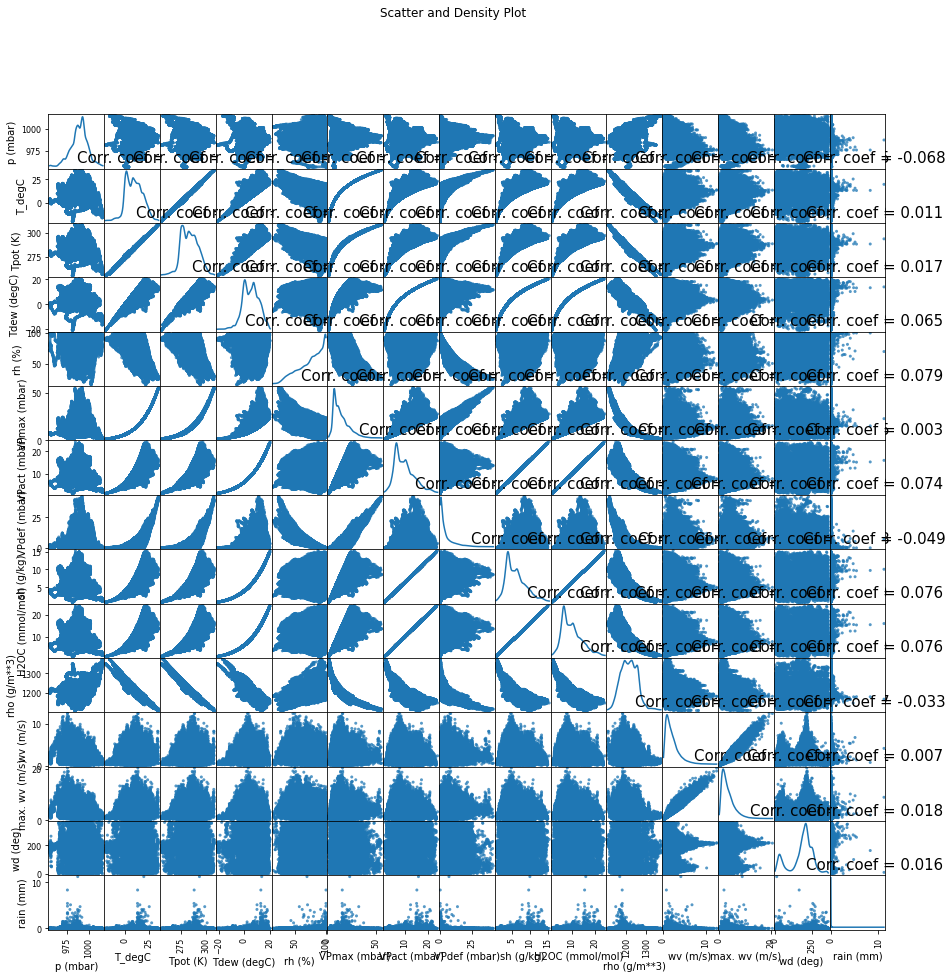

In [ ]:
# Scatter and density plots

import numpy as np

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 15:
        columnNames = columnNames[:15]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.savefig('scatterplot.png')

    plt.show()


plotScatterMatrix(df, 15, 15)


Stationarity

In [ ]:
# Check to See if our dataset is Stationary

#Summary Stats -Split
#Find mean and variance of each

df.shape

(52560, 22)

In [ ]:
df.columns

Index(['DateTime', 'p (mbar)', 'T_degC', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)',
       'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'CO2 (ppm)'],
      dtype='object')

In [ ]:
# Create A Series
S = df['T_degC'].values

In [ ]:
# Split our dataset
len(S)/2

26280.0

In [ ]:
S1, S2 = X[0:26280], X[26280:]

In [ ]:

mean1, mean2 = S1.mean(), S2.mean()
var1, var2 = S1.var(), S2.var()
print('mean1={}, mean2={}'.format(mean1, mean2))
print('variance1={}, variance2={}'.format(var1, var2))

mean1=p (mbar)                 989.710673
Tpot (K)                 288.994599
Tdew (degC)                9.533242
rh (%)                    73.622598
VPmax (mbar)              18.527870
VPact (mbar)              12.392446
VPdef (mbar)               6.135274
sh (g/kg)                  7.834926
H2OC (mmol/mol)           12.531347
rho (g/m**3)            1191.678460
wv (m/s)                   1.950664
max. wv (m/s)              3.235691
wd (deg)                 177.822142
rain (mm)                  0.015643
raining (s)               27.041476
SWDR (W/m²)              149.881689
PAR (µmol/m²/s)          299.560912
max. PAR (µmol/m²/s)     354.565726
Tlog (degC)               25.701156
CO2 (ppm)                420.052275
dtype: float64, mean2=p (mbar)                 988.315013
Tpot (K)                 278.801338
Tdew (degC)                1.114587
rh (%)                    80.230249
VPmax (mbar)               9.276000
VPact (mbar)               6.938319
VPdef (mbar)               2.337661


******* Not Stationary since the Variance is not in range & Mean is not constant


Moving Average Method


In [ ]:
temp_df = df[["DateTime","T_degC"]] #selecting date time and temperature column
temp_df.head()

,DateTime,T_degC
0,2020-06-01 00:00:00,12.25
1,2020-06-01 00:10:00,12.39
2,2020-06-01 00:20:00,11.95
3,2020-06-01 00:30:00,12.26
4,2020-06-01 00:40:00,12.95


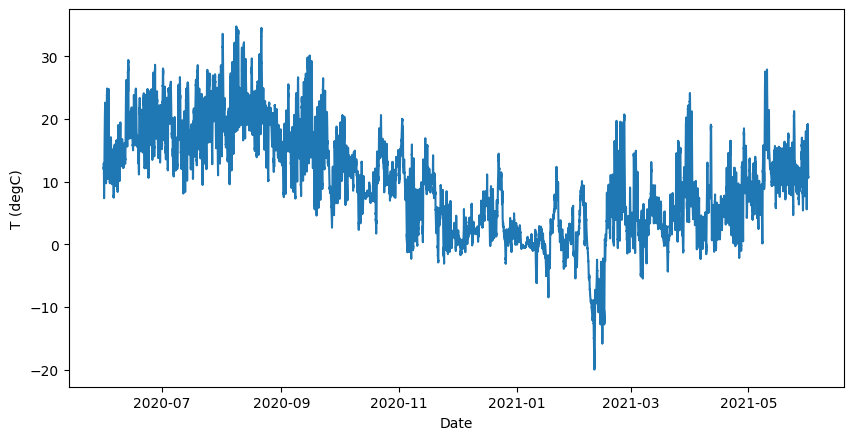

In [ ]:
plt.figure(figsize = (10,5), dpi = 100) #Visulaization of the data
plt.plot(temp_df.DateTime , temp_df.T_degC)
plt.xlabel('Date')
plt.ylabel('T (degC)')
plt.show()

In [ ]:
ts = temp_df.drop("DateTime", axis = 1)

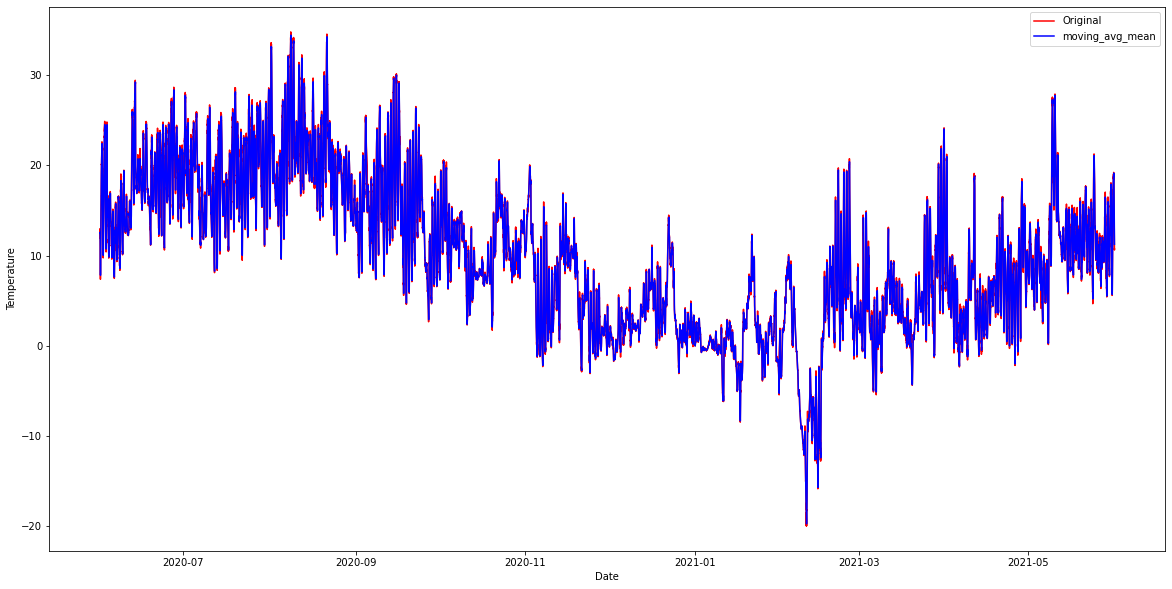

In [ ]:
window_size = 7
moving_avg = temp_df.T_degC.rolling(7).mean()
plt.figure(figsize=(20,10))
plt.plot(temp_df.DateTime,temp_df.T_degC, color = "red",label = "Original")
plt.plot(temp_df.DateTime, moving_avg, color='blue', label = "moving_avg_mean")

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# Machine Learning Models


1. Decision Tree Regression


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Decision Tree Regressor training
D_reg = DecisionTreeRegressor(max_depth=8)
D_reg.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Preidiction from the trained model
y_pre = D_reg.predict(X_test)

In [ ]:
# Print results to evaluate model
print("Showing Performance Metrics for Decision Tree Regressor\n")

#comparing the predicted data to actual data
data=pd.DataFrame({'Actual':y_test, 'Predicted':y_pre})
data

Showing Performance Metrics for Decision Tree Regressor



,Actual,Predicted
50042,14.79,14.789202
35069,-1.26,-1.316686
30774,3.17,3.189755
918,12.03,12.037885
14516,21.81,21.864109
...,...,...
12447,21.72,21.682920
25252,6.15,6.138496
42300,5.53,5.581406
22890,0.78,0.762719


In [ ]:
print ("Training Accuracy: {}".format(D_reg.score(X_train, y_train)))
print ("Testing Accuracy: {}".format(D_reg.score(X_test, y_test)))

Training Accuracy: 0.9999618718411716
Testing Accuracy: 0.9999588754079833


In [ ]:
#evaluating the performance of the algorithm
from sklearn import metrics as mt
print('Mean Absolute Error:', mt.mean_absolute_error(y_test, y_pre))
print('Mean Squared Error:', mt.mean_squared_error(y_test, y_pre))
print('Root Mean Squared Error:', np.sqrt(mt.mean_squared_error(y_test, y_pre)))
accuracy = 100 - mt.mean_absolute_error(y_test, y_pre)*100
print("Accuracy:", round(accuracy,  2), '%')


Mean Absolute Error: 0.04050810509090939
Mean Squared Error: 0.0028208464171049926
Root Mean Squared Error: 0.053111641069590314
Accuracy: 95.95 %


2. Linear Regression

In [ ]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Print results to evaluate model
print("Showing Performance Metrics for Linear Regression\n")

print ("Training Accuracy: {}".format(model.score(X_train, y_train)))
print ("Testing Accuracy: {}".format(model.score(X_test, y_test)))
predicted = model.predict(X_test)
predicted
predicted_df = pd.DataFrame(data = predicted,columns=['T (degC)'])
predicted_df.head()

Showing Performance Metrics for Linear Regression

Training Accuracy: 0.9999314806161447
Testing Accuracy: 0.9999302571118308


,T (degC)
0,14.734949
1,-1.263503
2,3.198197
3,12.061270
4,21.796721


In [ ]:
#Actual
y_test.head()

#comparing the predicted data to actual data
data=pd.DataFrame({'Actual':y_test, 'Predicted':predicted})
data

,Actual,Predicted
50042,14.79,14.734949
35069,-1.26,-1.263503
30774,3.17,3.198197
918,12.03,12.061270
14516,21.81,21.796721
...,...,...
12447,21.72,21.560886
25252,6.15,6.153491
42300,5.53,5.552497
22890,0.78,0.740526


In [ ]:
#evaluating the performance of the algorithm
from sklearn import metrics as mt
print('Mean Absolute Error:', mt.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', mt.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(mt.mean_squared_error(y_test, predicted)))
accuracy = 100 - mt.mean_absolute_error(y_test, predicted)*100
print("Accuracy:", round(accuracy,  2), '%')


Mean Absolute Error: 0.04487157028729896
Mean Squared Error: 0.004783852351189322
Root Mean Squared Error: 0.06916539851102806
Accuracy: 95.51 %


3. Support  Vector Machine

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Support Vector Machine Model setup after parameter tuning
svr = SVR(kernel = 'rbf', C = 1000, gamma = 0.00001)
svr.fit(X_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Print results to evaluate model
print("Showing Performance Metrics for Support Vector Machine\n")

print ("Training Accuracy: {}".format(svr.score(X_train, y_train)))
print ("Testing Accuracy: {}".format(svr.score(X_test, y_test)))
S_predicted = svr.predict(X_test)
S_predicted
predicted_df = pd.DataFrame(data = S_predicted,columns=['T (degC)'])
predicted_df.head()

Showing Performance Metrics for Support Vector Machine

Training Accuracy: 0.9999699461603045
Testing Accuracy: 0.9994140189261141


,T (degC)
0,14.817733
1,-1.297650
2,3.127162
3,11.998093
4,21.812236


In [ ]:
#Actual
y_test.head()

#comparing the predicted data to actual data
data=pd.DataFrame({'Actual':y_test, 'Predicted':S_predicted})
data

,Actual,Predicted
50042,14.79,14.817733
35069,-1.26,-1.297650
30774,3.17,3.127162
918,12.03,11.998093
14516,21.81,21.812236
...,...,...
12447,21.72,21.627156
25252,6.15,6.200236
42300,5.53,5.520446
22890,0.78,0.826434


In [ ]:
print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=svr, X=X_train, y=y_train, cv=3)
print("Accuracy using 3 folds: ")
print(cv_accuracy)

print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))

print("\n")

Cross Validation Accuracy: 



In [ ]:
#evaluating the performance of the algorithm
from sklearn import metrics as mt
print('Mean Absolute Error:', mt.mean_absolute_error(y_test, S_predicted))
print('Mean Squared Error:', mt.mean_squared_error(y_test, S_predicted))
print('Root Mean Squared Error:', np.sqrt(mt.mean_squared_error(y_test, S_predicted)))
accuracy = 100 - mt.mean_absolute_error(y_test, S_predicted)*100
print("Accuracy:", round(accuracy,  2), '%')

Mean Absolute Error: 0.04473455055199925
Mean Squared Error: 0.04019401851072105
Root Mean Squared Error: 0.20048445952422608
Accuracy: 95.53 %


4. Random forest regression

In [ ]:
# Import the model
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
# Print results to evaluate model
print("Showing Performance Metrics for Random Forest Regressor\n")

print ("Training Accuracy: {}".format(rf.score(X_train, y_train)))
print ("Testing Accuracy: {}".format(rf.score(X_test, y_test)))

#Preidiction from the trained model
RFR_predicted = rf.predict(X_test)
#comparing the predicted data to actual data
data=pd.DataFrame({'Actual':y_test, 'Predicted':RFR_predicted})
data


Showing Performance Metrics for Random Forest Regressor

Training Accuracy: 0.9999998718528891
Testing Accuracy: 0.9999985053661385


,Actual,Predicted
50042,14.79,14.79000
35069,-1.26,-1.25581
30774,3.17,3.16465
918,12.03,12.03002
14516,21.81,21.80992
...,...,...
12447,21.72,21.71950
25252,6.15,6.13659
42300,5.53,5.53483
22890,0.78,0.78801


In [ ]:
#evaluating the performance of the algorithm
from sklearn import metrics as mt
print('Mean Absolute Error:', mt.mean_absolute_error(y_test, RFR_predicted)*100)
print('Mean Squared Error:', mt.mean_squared_error(y_test, RFR_predicted))
print('Root Mean Squared Error:', np.sqrt(mt.mean_squared_error(y_test, RFR_predicted)))
accuracy = 100 - mt.mean_absolute_error(y_test, RFR_predicted)*100
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.3495394469842291
Mean Squared Error: 0.00010252095804164466
Root Mean Squared Error: 0.010125263356656195
Accuracy: 99.65 %.
